# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


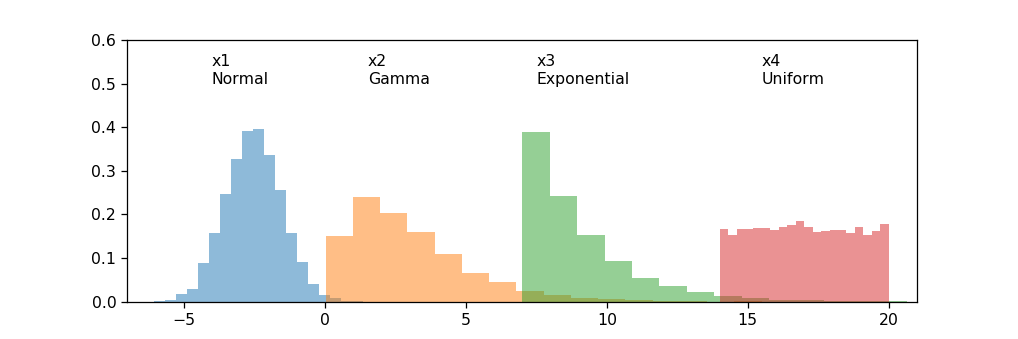

Text(15.495913373059835, 0.5, 'x4\nUniform')

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


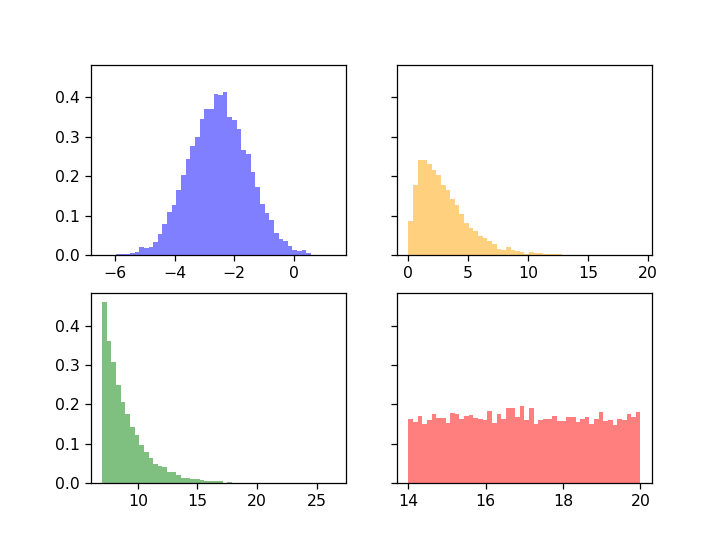

In [2]:
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2, sharey = True)
axes = [ax1, ax2, ax3, ax4]
xs = [x1,x2,x3,x4]
colors = ['blue', 'orange', 'green', 'red' ]
#ax1.hist(x1, bins=20)
#ax2.hist(x2, bins = 20)
#ax3.hist(x3, bins = 20)
#ax4.hist(x4, bins = 20)

for n in range(len(axes)):
    axes[n].hist(xs[n], bins = 50, density = True, color = colors[n], alpha = 0.5)
    

In [3]:
n = 100
axes = [ax1, ax2, ax3, ax4]
xs = [x1,x2,x3,x4]

def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    bins = np.arange(-6, 20, 0.5)
    ax1.set_xlim(-6,1)
    ax2.set_xlim(-1,11)
    ax3.set_xlim(6,19)
    ax4.set_xlim(13,21)
    #fig.suptitile('Distributions')
    for i in range(4):
        axes[i].hist(xs[i][:curr], bins=bins, color = colors[i], alpha = 0.5)
        #plt.gca().set_ylabel('Frequency')
        #plt.gca().set_xlabel('Value')
        #plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


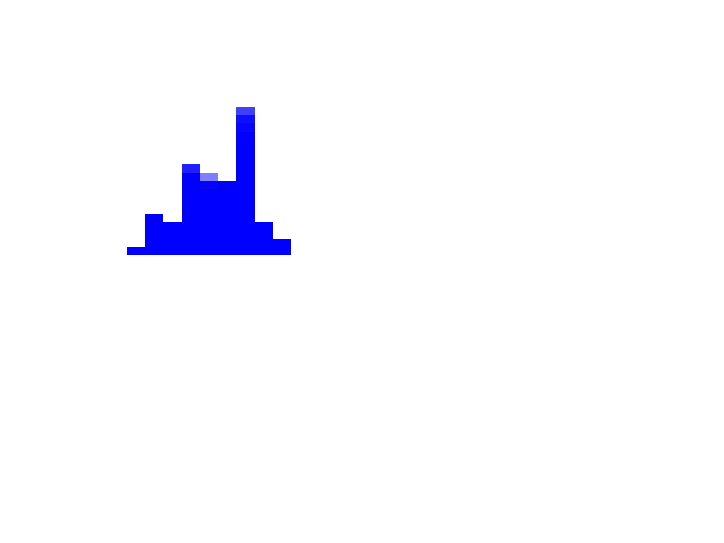

In [4]:
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2, sharey = True)
axes = [ax1, ax2, ax3, ax4]
xs = [x1,x2,x3,x4]
colors = ['blue', 'orange', 'green', 'red' ]

a = animation.FuncAnimation(fig, update, interval=100)